# Prac 03. Part 1

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [25, 10]

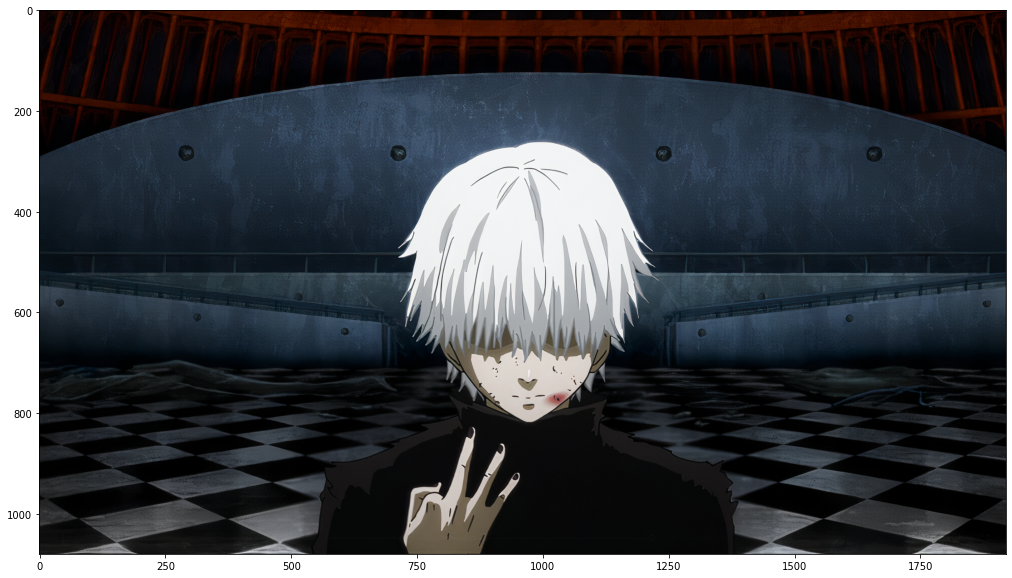

In [15]:
img = cv2.imread('../lab1/kaneki.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

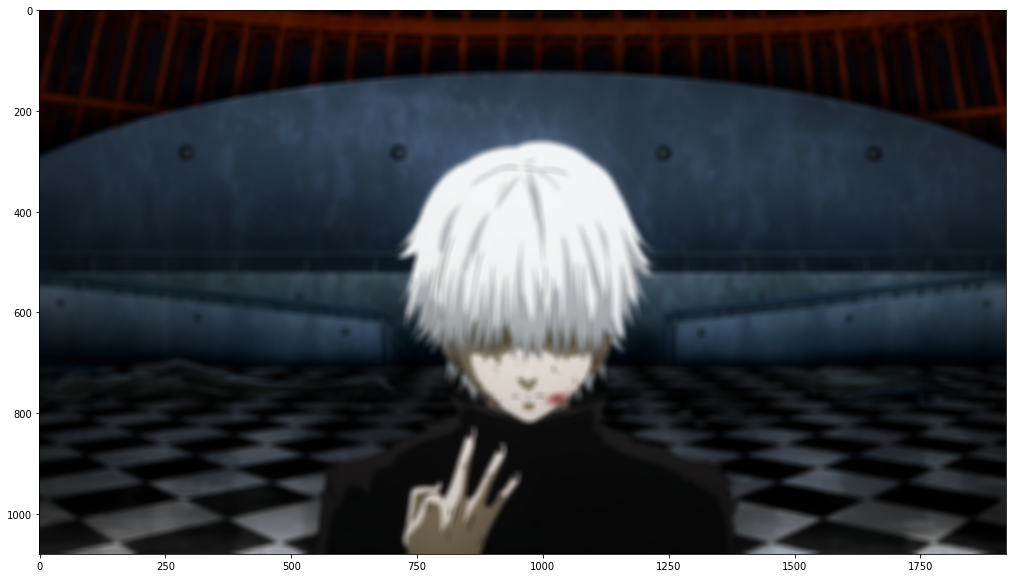

In [25]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, (15, 15), 10)

plt.imshow(unsharp)

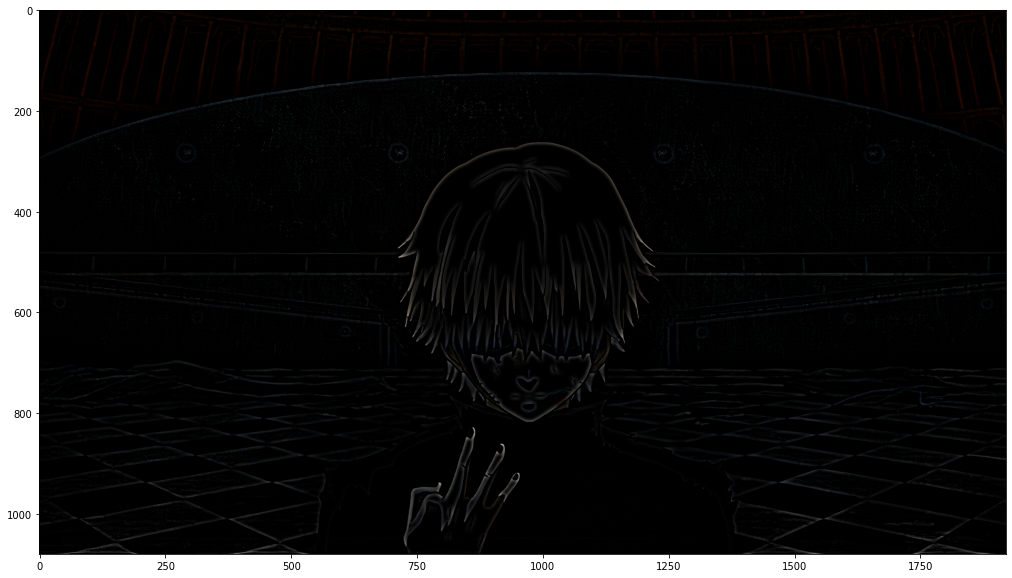

In [26]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
img_float = img.astype(np.float32)
unsharp_float = unsharp.astype(np.float32)
diff_float = img_float - unsharp_float
diff = np.clip(diff_float, 0, 255).astype(np.uint8)
plt.imshow(diff)


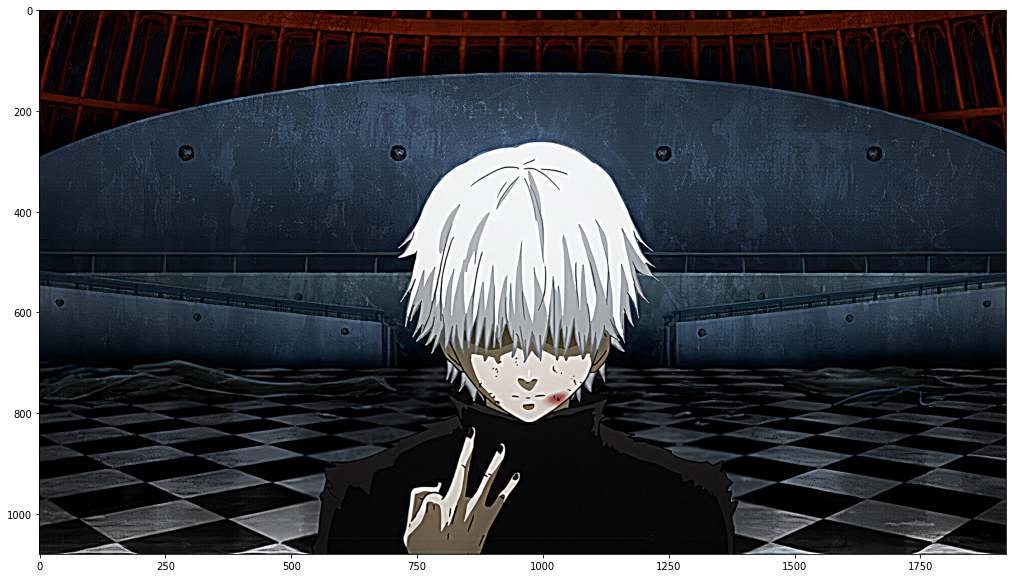

In [34]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
img_float = img.astype(np.float32)
unsharp_float = unsharp.astype(np.float32)
amount = 1.5
sharpened_float = img_float + (img_float - unsharp_float) * amount
sharpened = np.clip(sharpened_float, 0, 255).astype(np.uint8)
plt.imshow(sharpened)

### Questions
* What is a good (reasonable) value for the `amount` parameter? 0,5 -- 1,5
 * What happens if it is too small? Зображення буде недстатньо чітке
 * What happens if it is too large? Зображення буде занадто зернисте 